In [19]:
import openmeteo_requests
import requests_cache
import requests
import pandas as pd
from retry_requests import retry
import matplotlib.pyplot as plt


In [3]:
#cache_session = requests_cache.CachedSession('.cache', expire_after=-1) #Guarda en un archivo local .cache para no tener que pedirlo de nuevo
#retry_session = retry(cache_session, retries=5, backoff_factor=0.2)

session = requests.Session()
retry_session = retry(session, retries=5, backoff_factor=0.2)

openmeteo = openmeteo_requests.Client(session=retry_session)

url = "https://archive-api.open-meteo.com/v1/archive"

In [ ]:
parametros = {
    "latitude": 40.47,
    "longitude" : -73.58, #coordenadas de Central Park
    "start_date" : "2025-01-01",
    "end_date" : "2026-01-01",
    "hourly" : ["temperature_2m", "rain", "precipitation", "wind_speed_10m", "snowfall", "cloud_cover"],
    "timezone" : "auto"
}

In [5]:
respuestas = openmeteo.weather_api(url, params = parametros)
respuesta = respuestas[0]
hourly = respuesta.Hourly()
temp_array = hourly.Variables(0).ValuesAsNumpy()
lluvia_array = hourly.Variables(1).ValuesAsNumpy()
nieve_array = hourly.Variables(2).ValuesAsNumpy()
prec_array = hourly.Variables(3).ValuesAsNumpy()
nieve_prof_array = hourly.Variables(4).ValuesAsNumpy()

In [6]:
dates = pd.date_range(
        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
        end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
        freq=pd.Timedelta(seconds=hourly.Interval()),
        inclusive="left"
)

datos = {
    "Fecha" : dates,
    "Temperatura (ºC)" : temp_array,
    "Lluvia (mm)" : lluvia_array,
    "Nieve (cm)": nieve_array,
    "Precipitacion (mm)" : prec_array,
    "Profundidad de nieve (m)" : nieve_prof_array
}
df = pd.DataFrame(datos)

In [18]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

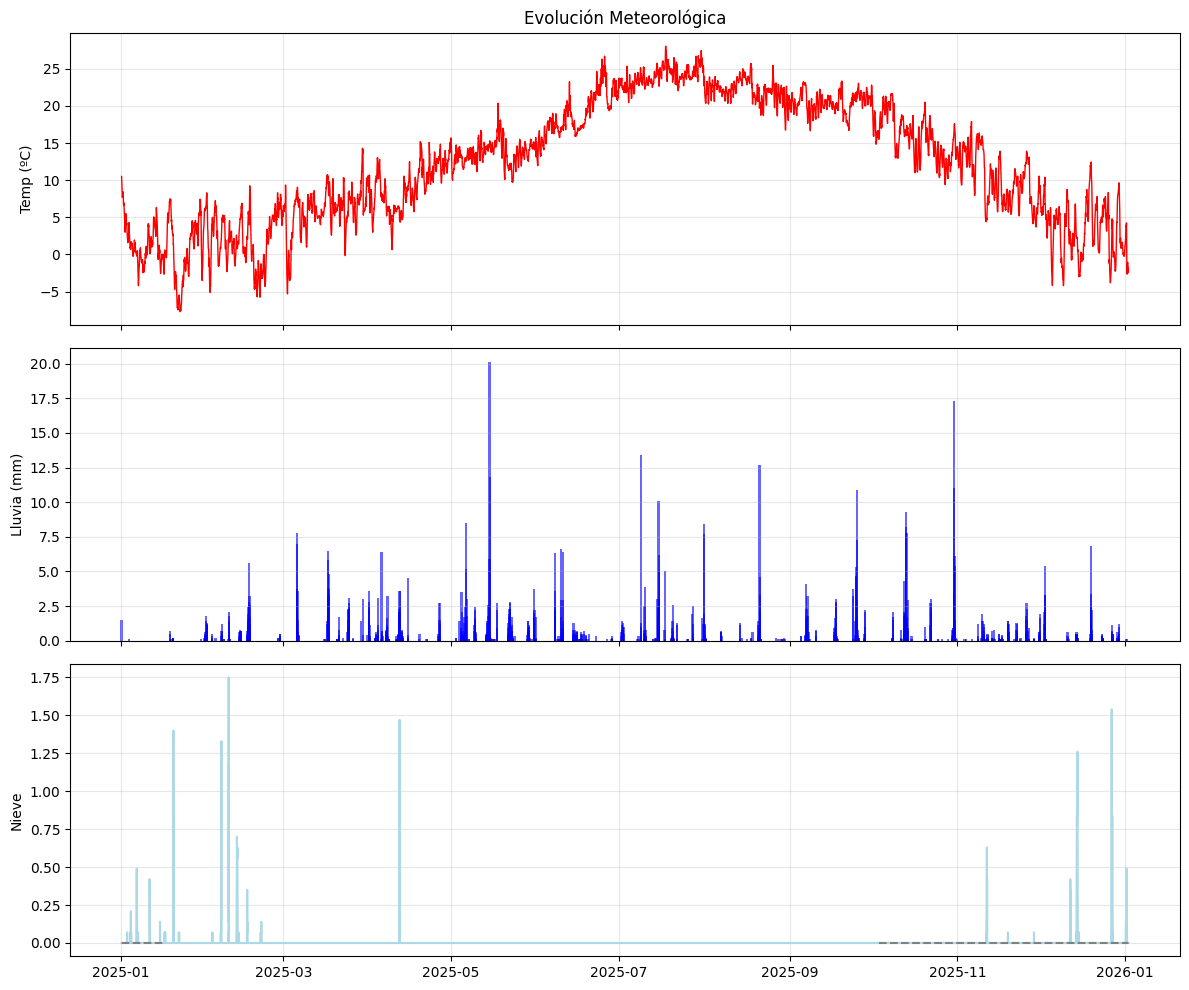

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=True)

# 1. Temperatura
axes[0].plot(df.index, df['Temperatura (ºC)'], color='red', linewidth=1)
axes[0].set_ylabel('Temp (ºC)')
axes[0].set_title('Evolución Meteorológica')
axes[0].grid(True, alpha=0.3)

# 2. Lluvia y Precipitación
axes[1].bar(df.index, df['Lluvia (mm)'], color='blue', label='Lluvia', alpha=0.6)
axes[1].set_ylabel('Lluvia (mm)')
axes[1].grid(True, alpha=0.3)

# 3. Nieve y Profundidad
axes[2].plot(df.index, df['Nieve (cm)'], color='lightblue', label='Nieve')
axes[2].plot(df.index, df['Profundidad de nieve (m)'], color='gray', linestyle='--')
axes[2].set_ylabel('Nieve (cm)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
suma_total_nieve = sum(df['Nieve (cm)'])
print(suma_total_nieve)

42.419999569654465


In [9]:
df2 = df[df["Nieve (cm)"] > 0]
df2

,Fecha,Temperatura (ºC),Lluvia (mm),Nieve (cm),Precipitacion (mm),Profundidad de nieve (m)
48,2025-01-03 05:00:00+00:00,3.10,0.0,0.07,0.1,0.0
49,2025-01-03 06:00:00+00:00,2.80,0.0,0.07,0.1,0.0
75,2025-01-04 08:00:00+00:00,1.00,0.0,0.07,0.1,0.0
76,2025-01-04 09:00:00+00:00,0.75,0.0,0.07,0.1,0.0
77,2025-01-04 10:00:00+00:00,0.80,0.0,0.07,0.1,0.0
...,...,...,...,...,...,...
8760,2026-01-01 05:00:00+00:00,2.65,0.0,0.07,0.1,0.0
8761,2026-01-01 06:00:00+00:00,3.15,0.0,0.14,0.2,0.0
8762,2026-01-01 07:00:00+00:00,3.95,0.1,0.07,0.2,0.0
8767,2026-01-01 12:00:00+00:00,1.60,0.1,0.49,0.8,0.0


In [15]:
df3 = df[df["Lluvia (mm)"] > 0]
df3

,Fecha,Temperatura (ºC),Lluvia (mm),Nieve (cm),Precipitacion (mm),Profundidad de nieve (m)
0,2025-01-01 05:00:00+00:00,10.50,1.5,0.00,1.5,0.0
66,2025-01-03 23:00:00+00:00,4.05,0.1,0.00,0.1,0.0
422,2025-01-18 19:00:00+00:00,7.50,0.5,0.00,0.5,NaN
423,2025-01-18 20:00:00+00:00,7.45,0.7,0.00,0.7,NaN
424,2025-01-18 21:00:00+00:00,7.30,0.1,0.00,0.1,NaN
...,...,...,...,...,...,...
8702,2025-12-29 19:00:00+00:00,9.35,1.2,0.00,1.2,0.0
8703,2025-12-29 20:00:00+00:00,8.75,0.2,0.00,0.2,0.0
8762,2026-01-01 07:00:00+00:00,3.95,0.1,0.07,0.2,0.0
8764,2026-01-01 09:00:00+00:00,3.75,0.1,0.00,0.1,0.0


In [10]:
longitud = len(df)
for columna in df.columns:
        nulos = df[columna].isnull().sum()
        print(columna, " tiene ", nulos, "con porcentaje de nulos del ", nulos / longitud)


Fecha  tiene  0 con porcentaje de nulos del  0.0
Temperatura (ºC)  tiene  0 con porcentaje de nulos del  0.0
Lluvia (mm)  tiene  0 con porcentaje de nulos del  0.0
Nieve (cm)  tiene  0 con porcentaje de nulos del  0.0
Precipitacion (mm)  tiene  0 con porcentaje de nulos del  0.0
Profundidad de nieve (m)  tiene  6251 con porcentaje de nulos del  0.7116347905282332


In [14]:
df.to_parquet("clima_2025.parquet", index = False)
print("Guardado")

Guardado
